# Team Project #3 - Spatial Continuity Evaluation
## Dr. Pyrcz's Stochastic Method for Reservoir Modeling
## Team 4: Qiqi Wang, Jiacheng Wang, Yanli pei, Honggeun Jo



## Objectives
### 1. Calculate variogram map for porosity to determine primary directions and possible ranges
               
### 2. Calculate isotropic and directional variograms
        *Work Flow 
        1) facies (indicator transform, by facies)
        2) porosity (by facies)
        3) permeability (by facies)
        
### 3. Model valid semivariogram models for each above, summarize and comment on heterogeneity and spatial prediction
        *Work Flow 
        1) facies (indicator transform, by facies)
        2) porosity (by facies)
        3) permeability (by facies)

# 0. Load package, initial setting, and fetching data

In [1]:
## Import needed package
import os                                                   # set current working directory 
import numpy as np                                          # ndarrays
import pandas as pd                                         # DataFrames
import matplotlib.pyplot as plt                             # plotting
from scipy import stats                                     # summary stats
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python        
import seaborn as sns
import scipy.stats as st                               # statistical methods
import scipy.signal as signal             # kernel for moving window calculation
import random
import math  

## Set Working Directory
os.chdir("D:/UT Course/Spring2019/Stoch Meth/Update#3")  # set the working directory

# Load Data 
df = pd.read_csv("4_sample_data.csv")                       # well sample data
AI_map = np.loadtxt("4_AI.csv", delimiter = ",")            # AI map 

It seems that the first column seems not needed...

In [2]:
df.head()

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI
0,5,70.0,580.0,1.0,0.102475,30.149009,3477.934210
1,15,140.0,860.0,1.0,0.086987,8.540175,3500.807463
2,22,140.0,370.0,1.0,0.091117,266.893061,3478.303116
3,23,140.0,300.0,1.0,0.097404,5.483678,3428.434722
4,24,140.0,230.0,1.0,0.089087,29.146330,3853.554854


In [3]:
df_subset = df.iloc[:,1:7] 
df_subset.head()

,X,Y,Facies,Porosity,Perm,AI
0,70.0,580.0,1.0,0.102475,30.149009,3477.934210
1,140.0,860.0,1.0,0.086987,8.540175,3500.807463
2,140.0,370.0,1.0,0.091117,266.893061,3478.303116
3,140.0,300.0,1.0,0.097404,5.483678,3428.434722
4,140.0,230.0,1.0,0.089087,29.146330,3853.554854


In [4]:
print ("The number of well data sample is %.0f, \n and total number of reservoir cells are %.0f" % (df_subset.shape[0], AI_map.shape[0]*AI_map.shape[1]))

The number of well data sample is 178, 
 and total number of reservoir cells are 10000


In [5]:
# Define initial setting
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values
pormin = 0.0; pormax = 0.2;             # range of porosity values
permmin = 0.01; permmax = 6000;
AImin = 1000.0; AImax = 5500
Fmin = 0; Fmax = 1

# 1.Calculate Variogram Map for Porosity

In [6]:
geostats.nscore                                         # see the input parameters required by the nscore function

<function geostatspy.geostats.nscore(df, vcol, wcol=0, ismooth=0, dfsmooth=0, smcol=0, smwcol=0)>

In [7]:
#Transform to Gaussian by Facies
df['NPor'], tvPor, tnsPor = geostats.nscore(df, 'Porosity') # nscore transform for all facies porosity 
df['NPerm'], tvPermSand, tnsPermSand = geostats.nscore(df, 'Perm')  # nscore transform for all facies permeability

In [8]:
df.head()                                               # preview sand DataFrame with nscore transforms

,Unnamed: 0,X,Y,Facies,Porosity,Perm,AI,NPor,NPerm
0,5,70.0,580.0,1.0,0.102475,30.149009,3477.934210,-0.063412,0.134182
1,15,140.0,860.0,1.0,0.086987,8.540175,3500.807463,-1.143553,-0.490761
2,22,140.0,370.0,1.0,0.091117,266.893061,3478.303116,-0.674490,1.199491
3,23,140.0,300.0,1.0,0.097404,5.483678,3428.434722,-0.205632,-0.692276
4,24,140.0,230.0,1.0,0.089087,29.146330,3853.554854,-0.926988,0.119986


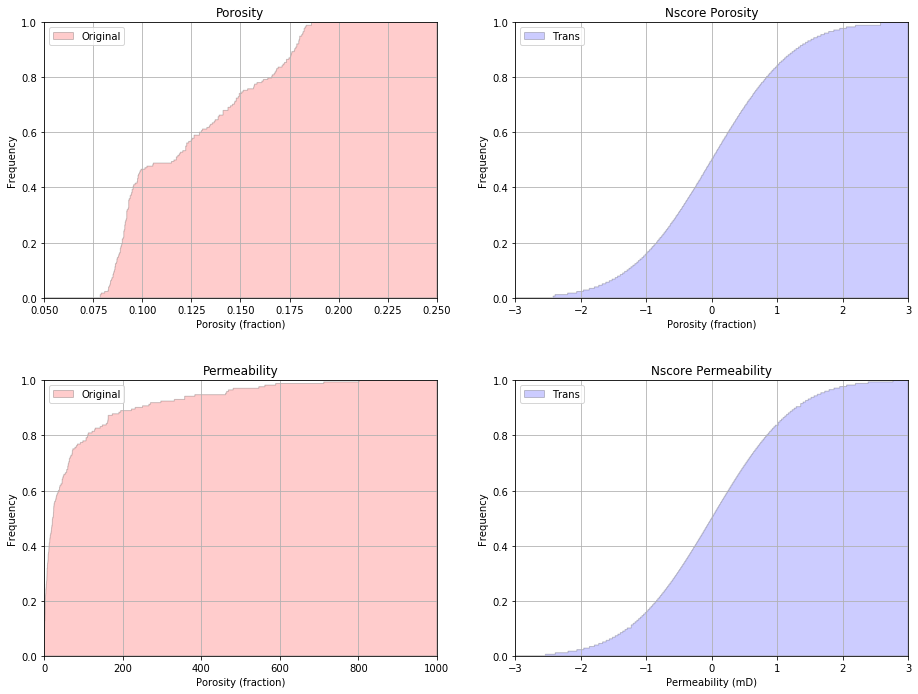

In [9]:
plt.subplot(221)                                        # plot original sand and shale porosity histograms
plt.hist(df['Porosity'], facecolor='red',bins=np.linspace(0.0,0.25,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.05,0.25]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(222)  
plt.hist(df['NPor'], facecolor='blue',bins=np.linspace(-3.0,3.0,1000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Nscore Porosity')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(223)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['Perm'], facecolor='red',bins=np.linspace(0.0,1000.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label='Original')
plt.xlim([0.0,1000.0]); plt.ylim([0,1.0])
plt.xlabel('Porosity (fraction)'); plt.ylabel('Frequency'); plt.title('Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplot(224)                                        # plot nscore transformed sand and shale histograms
plt.hist(df['NPerm'], facecolor='blue',bins=np.linspace(-3.0,3.0,100000),histtype="stepfilled",alpha=0.2,density=True,cumulative=True,edgecolor='black',label = 'Trans')
plt.xlim([-3.0,3.0]); plt.ylim([0,1.0])
plt.xlabel('Permeability (mD)'); plt.ylabel('Frequency'); plt.title('Nscore Permeability')
plt.legend(loc='upper left')
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.2, wspace=0.2, hspace=0.3)
plt.show()

#### Ocular Inspection of Posted Data

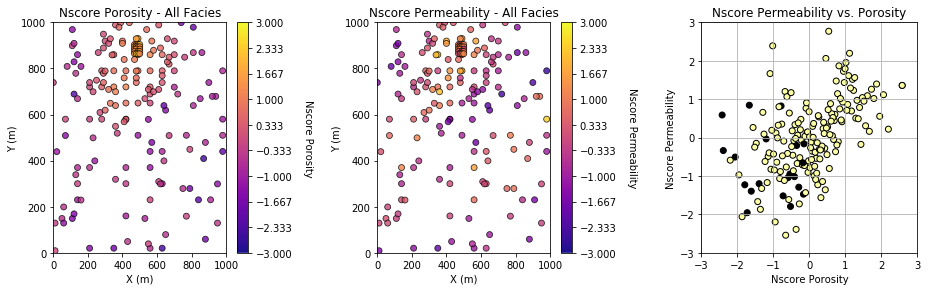

In [10]:
cmap = plt.cm.plasma                    # color map
plt.subplot(131)
GSLIB.locmap_st(df,'X','Y','NPor',0,1000,0,1000,-3,3,'Nscore Porosity - All Facies','X (m)','Y (m)','Nscore Porosity',cmap)

plt.subplot(132)
GSLIB.locmap_st(df,'X','Y','NPerm',0,1000,0,1000,-3,3,'Nscore Permeability - All Facies','X (m)','Y (m)','Nscore Permeability',cmap)

plt.subplot(133)
facies = df['Facies'].values +0.01
plt.scatter(df['NPor'],df['NPerm'],c = facies,edgecolor = 'black',cmap = plt.cm.inferno)
#plt.plot([-3,3],[-3,3],color = 'black')
plt.xlabel(r'Nscore Porosity')
plt.ylabel(r'Nscore Permeability')
plt.title('Nscore Permeability vs. Porosity')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid(True)

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=0.8, wspace=0.5, hspace=0.3)
plt.show()

#### Quantitative Methods

In [11]:
# GSLIB's VARMAP program (Deutsch and Journel, 1998) converted from the original Fortran to Python 
# by Michael Pyrcz, the University of Texas at Austin (Jan, 2019)
# Note simplified for 2D, irrelgular data only

def varmapv(df,xcol,ycol,vcol,tmin,tmax,nxlag,nylag,dxlag,dylag,minnp,isill): 

# Parameters - consistent with original GSLIB    
# df - DataFrame with the spatial data, xcol, ycol, vcol coordinates and property columns
# tmin, tmax - property trimming limits
# xlag, xltol - lag distance and lag distance tolerance
# nlag - number of lags to calculate
# azm, atol - azimuth and azimuth tolerance
# bandwh - horizontal bandwidth / maximum distance offset orthogonal to azimuth
# isill - 1 for standardize sill

# Load the data

    df_extract = df.loc[(df[vcol] >= tmin) & (df[vcol] <= tmax)]    # trim values outside tmin and tmax
    nd = len(df_extract)
    x = df_extract[xcol].values
    y = df_extract[ycol].values
    vr = df_extract[vcol].values
    
# Summary statistics for the data after trimming
    avg = vr.mean()
    stdev = vr.std()
    sills = stdev**2.0
    ssq = sills
    vrmin = vr.min()
    vrmax = vr.max()   
    
# Initialize the summation arrays
    npp = np.zeros((nylag*2+1,nxlag*2+1))
    gam = np.zeros((nylag*2+1,nxlag*2+1))
    nppf = np.zeros((nylag*2+1,nxlag*2+1))
    gamf = np.zeros((nylag*2+1,nxlag*2+1))
    hm = np.zeros((nylag*2+1,nxlag*2+1))
    tm = np.zeros((nylag*2+1,nxlag*2+1))
    hv = np.zeros((nylag*2+1,nxlag*2+1))
    tv = np.zeros((nylag*2+1,nxlag*2+1))

# First fix the location of a seed point: 
    for i in range(0,nd):     
# Second loop over the data: 
        for j in range(0,nd): 
# The lag:
            ydis = y[j] - y[i]
            iyl = nylag + int(ydis/dylag)
            if iyl < 0 or iyl > nylag*2: # acocunting for 0,...,n-1 array indexing
                continue
            xdis = x[j] - x[i]
            ixl = nxlag + int(xdis/dxlag)
            if ixl < 0 or ixl > nxlag*2: # acocunting for 0,...,n-1 array indexing
                continue
                
# We have an acceptable pair, therefore accumulate all the statistics
# that are required for the variogram:
            npp[iyl,ixl] = npp[iyl,ixl] + 1 # our ndarrays read from the base to top, so we flip
            tm[iyl,ixl] = tm[iyl,ixl] + vr[i]
            hm[iyl,ixl] = hm[iyl,ixl] + vr[j]
            tv[iyl,ixl] = tm[iyl,ixl] + vr[i]*vr[i]
            hv[iyl,ixl] = hm[iyl,ixl] + vr[j]*vr[j]
            gam[iyl,ixl] = gam[iyl,ixl] + ((vr[i]-vr[j])*(vr[i]-vr[j]))

# Get average values for gam, hm, tm, hv, and tv, then compute
# the correct "variogram" measure:
    for iy in range(0,nylag*2+1): 
        for ix in range(0,nxlag*2+1): 
            if npp[iy,ix] <= minnp:
                gam[iy,ix] = -999.
                hm[iy,ix]  = -999.
                tm[iy,ix]  = -999.
                hv[iy,ix]  = -999.
                tv[iy,ix]  = -999.
            else:
                rnum = npp[iy,ix]
                gam[iy,ix] = gam[iy,ix] / (2*rnum) # semivariogram
                hm[iy,ix] = hm[iy,ix] / rnum
                tm[iy,ix] = tm[iy,ix] / rnum
                hv[iy,ix] = hv[iy,ix] / rnum - hm[iy,ix]*hm[iy,ix]
                tv[iy,ix] = tv[iy,ix] / rnum - tm[iy,ix]*tm[iy,ix]
                
# Attempt to standardize:
            if isill > 0:
                gamf[iy,ix] = gamf[iy,ix]/sills

    for iy in range(0,nylag*2+1): 
        for ix in range(0,nxlag*2+1):             
            gamf[iy,ix] = gam[nylag*2-iy,ix]
            nppf[iy,ix] = npp[nylag*2-iy,ix]
            
    return gamf, nppf    


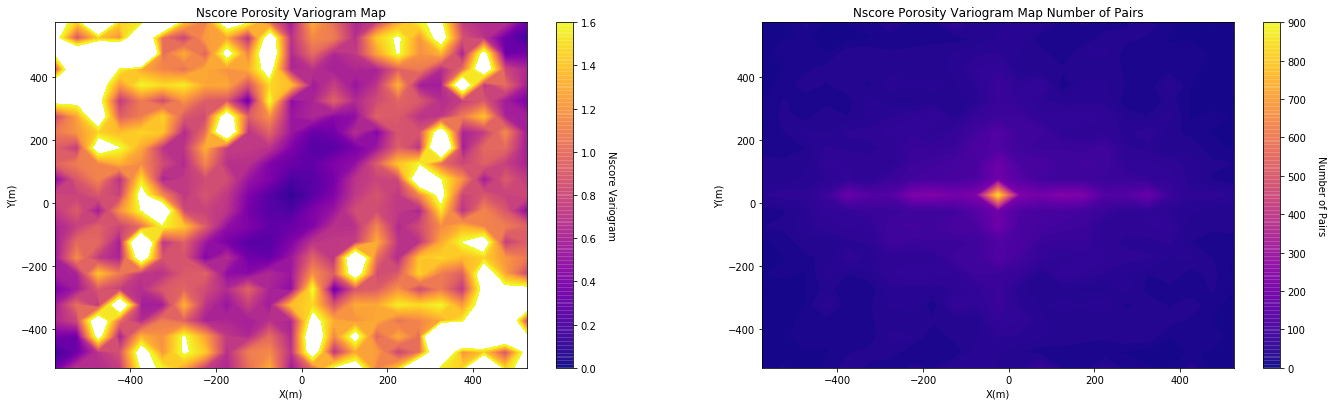

The shape of the output is (23, 23)


In [12]:
vmap, npmap = varmapv(df,'X','Y','NPor',tmin=-999,tmax=999,nxlag=11,nylag=11,dxlag=50,dylag=50,minnp=1,isill=1)

plt.subplot(121)
GSLIB.pixelplt_st(vmap,-575,575,-575,575,50.0,0,1.6,'Nscore Porosity Variogram Map','X(m)','Y(m)','Nscore Variogram',cmap)

plt.subplot(122)
GSLIB.pixelplt_st(npmap,-575,575,-575,575,50.0,0,900,'Nscore Porosity Variogram Map Number of Pairs','X(m)','Y(m)','Number of Pairs',cmap)

plt.subplots_adjust(left=0.0, bottom=0.0, right=3.0, top=1.2, wspace=0.2, hspace=0.2)
plt.show()

print('The shape of the output is ' + str(vmap.shape))

# 2. Calculation Isotropic and Directional Variograms


# 3. Model Valid Semivariogram Models
